In [1]:
import numpy as np
import pandas as pd
from datetime import date
from datetime import datetime
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import warnings
import re
from sklearn.cluster import KMeans
from sklearn.cluster import ward_tree
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import cdist
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm
from sklearn.pipeline import Pipeline
import seaborn as sns
import scipy.cluster.hierarchy as shc
from scipy.stats import norm
warnings.filterwarnings("ignore")

### 1. Read in data

In [2]:
Data = pd.read_excel('crypto55_5YR_alive.xlsx', header = [0,1])
Data.rename(columns = {'Unnamed: 0_level_0': ''}, inplace = True)
Data.set_index(('', 'Datetime'), inplace=True)
Data.tail()

ADA                                                \
             AdrActCnt  BlkCnt FeeMedUSD  PriceBTC  PriceUSD   TxCnt   
(, Datetime)                                                           
2019-09-26      5102.0  4319.0  0.006563  0.000005  0.038062  1854.0   
2019-09-27      4958.0  4320.0  0.006761  0.000005  0.039211  1848.0   
2019-09-28      3325.0  4320.0  0.006659  0.000005  0.038617  1253.0   
2019-09-29      3763.0  4320.0  0.006445  0.000005  0.037379  1346.0   
2019-09-30      4605.0  4320.0  0.006700  0.000005  0.038855  1792.0   

                   BAT                              ...        ZEC  \
             AdrActCnt  PriceBTC  PriceUSD   TxCnt  ... CapMVRVCur   
(, Datetime)                                        ...              
2019-09-26      1060.0  0.000019  0.152152  1158.0  ...   0.329999   
2019-09-27       997.0  0.000020  0.167543  1084.0  ...   0.353145   
2019-09-28       884.0  0.000020  0.164278   763.0  ...   0.380461   
2019-09-29       820.0  0.000020  0.158732   735.0  ...   0.356434   
2019-09-30      1192.0  0.000021  0.172543  1133.0  ...   0.366001   

                                                                        ZRX  \
                  DiffMean FeeMedUSD  PriceBTC   PriceUSD   TxCnt AdrActCnt   
(, Datetime)                                                                  
2019-09-26    9.025259e+07  0.001832  0.004337  35.091598  3267.0    1065.0   
2019-09-27    8.780822e+07  0.002158  0.004585  37.536284  2970.0     767.0   
2019-09-28    9.511524e+07  0.001346  0.004928  40.422088  2834.0     578.0   
2019-09-29    8.724780e+07  0.001413  0.004686  37.790264  2557.0     526.0   
2019-09-30    8.965523e+07  0.002318  0.004664  38.630198  3733.0     640.0   

                                          
              PriceBTC  PriceUSD   TxCnt  
(, Datetime)                              
2019-09-26    0.000027  0.220082  1573.0  
2019-09-27    0.000026  0.214173   894.0  
2019-09-28    0.000026  0.210839   638.0  
2019-09-29    0.000025  0.202396   623.0  
2019-09-30    0.000025  0.203569   800.0  

[5 rows x 288 columns]

In [3]:
for i in ['ADA', 'BAT', 'BCH', 'BTC', 'BTG', 'CVC', 'DAI', 'DASH', 'DCR', 'DGB',
       'DOGE', 'DRGN', 'ELF', 'ENG', 'EOS', 'ETC', 'ETH', 'ETHOS',
       'FUN', 'GAS', 'GNO', 'GNT', 'KNC', 'LINK', 'LOOM', 'LSK', 'LTC', 'MAID',
       'MANA', 'MKR', 'NEO', 'OMG', 'PAY', 'PIVX', 'POLY', 'POWR', 'PPT',
       'QASH', 'REP', 'SNT', 'TRX', 'TUSD', 'USDT', 'USDT_ETH', 'VTC', 'WAVES',
       'WTC', 'XEM', 'XLM', 'XMR', 'XRP', 'XTZ', 'XVG', 'ZEC', 'ZRX']:
    Data[i]['return'] = Data[i]['PriceUSD'].iloc[1:]/Data[i]['PriceUSD'].iloc[0:-1]

In [4]:
Data.tail()

ADA                                                \
             AdrActCnt  BlkCnt FeeMedUSD  PriceBTC  PriceUSD   TxCnt   
(, Datetime)                                                           
2019-09-26      5102.0  4319.0  0.006563  0.000005  0.038062  1854.0   
2019-09-27      4958.0  4320.0  0.006761  0.000005  0.039211  1848.0   
2019-09-28      3325.0  4320.0  0.006659  0.000005  0.038617  1253.0   
2019-09-29      3763.0  4320.0  0.006445  0.000005  0.037379  1346.0   
2019-09-30      4605.0  4320.0  0.006700  0.000005  0.038855  1792.0   

                   BAT                              ...        ZEC  \
             AdrActCnt  PriceBTC  PriceUSD   TxCnt  ... CapMVRVCur   
(, Datetime)                                        ...              
2019-09-26      1060.0  0.000019  0.152152  1158.0  ...   0.329999   
2019-09-27       997.0  0.000020  0.167543  1084.0  ...   0.353145   
2019-09-28       884.0  0.000020  0.164278   763.0  ...   0.380461   
2019-09-29       820.0  0.000020  0.158732   735.0  ...   0.356434   
2019-09-30      1192.0  0.000021  0.172543  1133.0  ...   0.366001   

                                                                        ZRX  \
                  DiffMean FeeMedUSD  PriceBTC   PriceUSD   TxCnt AdrActCnt   
(, Datetime)                                                                  
2019-09-26    9.025259e+07  0.001832  0.004337  35.091598  3267.0    1065.0   
2019-09-27    8.780822e+07  0.002158  0.004585  37.536284  2970.0     767.0   
2019-09-28    9.511524e+07  0.001346  0.004928  40.422088  2834.0     578.0   
2019-09-29    8.724780e+07  0.001413  0.004686  37.790264  2557.0     526.0   
2019-09-30    8.965523e+07  0.002318  0.004664  38.630198  3733.0     640.0   

                                          
              PriceBTC  PriceUSD   TxCnt  
(, Datetime)                              
2019-09-26    0.000027  0.220082  1573.0  
2019-09-27    0.000026  0.214173   894.0  
2019-09-28    0.000026  0.210839   638.0  
2019-09-29    0.000025  0.202396   623.0  
2019-09-30    0.000025  0.203569   800.0  

[5 rows x 288 columns]

In [5]:
Data = Data[['ADA', 'BAT', 'BCH', 'BTC', 'BTG', 'CVC', 'DAI', 'DASH', 'DCR', 'DGB',
       'DOGE', 'DRGN', 'ELF', 'ENG', 'EOS', 'ETC', 'ETH', 'ETHOS',
       'FUN', 'GAS', 'GNO', 'GNT', 'KNC', 'LINK', 'LOOM', 'LSK', 'LTC', 'MAID',
       'MANA', 'MKR', 'NEO', 'OMG', 'PAY', 'PIVX', 'POLY', 'POWR', 'PPT',
       'QASH', 'REP', 'SNT', 'TRX', 'TUSD', 'USDT', 'USDT_ETH', 'VTC', 'WAVES',
       'WTC', 'XEM', 'XLM', 'XMR', 'XRP', 'XTZ', 'XVG', 'ZEC', 'ZRX']]

In [6]:
for i in Data.columns.levels[0]:
    if i != '' :
        print(i, Data[i].columns)

ADA Index(['AdrActCnt', 'BlkCnt', 'FeeMedUSD', 'PriceBTC', 'PriceUSD', 'TxCnt'], dtype='object')
BAT Index(['AdrActCnt', 'PriceBTC', 'PriceUSD', 'TxCnt'], dtype='object')
BCH Index(['AdrActCnt', 'BlkCnt', 'CapMVRVCur', 'DiffMean', 'FeeMedUSD',
       'PriceBTC', 'PriceUSD', 'TxCnt'],
      dtype='object')
BTC Index(['AdrActCnt', 'BlkCnt', 'CapMVRVCur', 'DiffMean', 'FeeMedUSD',
       'PriceBTC', 'PriceUSD', 'TxCnt'],
      dtype='object')
BTG Index(['AdrActCnt', 'BlkCnt', 'CapMVRVCur', 'DiffMean', 'FeeMedUSD',
       'PriceBTC', 'PriceUSD', 'TxCnt'],
      dtype='object')
CVC Index(['AdrActCnt', 'PriceBTC', 'PriceUSD', 'TxCnt'], dtype='object')
DAI Index(['AdrActCnt', 'PriceBTC', 'PriceUSD', 'TxCnt'], dtype='object')
DASH Index(['AdrActCnt', 'BlkCnt', 'CapMVRVCur', 'DiffMean', 'FeeMedUSD',
       'PriceBTC', 'PriceUSD', 'TxCnt'],
      dtype='object')
DCR Index(['AdrActCnt', 'BlkCnt', 'CapMVRVCur', 'DiffMean', 'FeeMedUSD',
       'PriceBTC', 'PriceUSD', 'TxCnt'],
      dtype='object')


In [7]:
Price = Data[['ADA', 'BAT', 'BCH', 'BTC', 'BTG', 'CVC', 'DAI', 'DASH', 'DCR', 'DGB',
       'DOGE', 'DRGN', 'ELF', 'ENG', 'EOS', 'ETC', 'ETH', 'ETHOS',
       'FUN', 'GAS', 'GNO', 'GNT', 'KNC', 'LINK', 'LOOM', 'LSK', 'LTC', 'MAID',
       'MANA', 'MKR', 'NEO', 'OMG', 'PAY', 'PIVX', 'POLY', 'POWR', 'PPT',
       'QASH', 'REP', 'SNT', 'TRX', 'TUSD', 'USDT', 'USDT_ETH', 'VTC', 'WAVES',
       'WTC', 'XEM', 'XLM', 'XMR', 'XRP', 'XTZ', 'XVG', 'ZEC', 'ZRX']].loc(axis=1)[:,'PriceUSD']
Price.columns =['ADA', 'BAT', 'BCH', 'BTC', 'BTG', 'CVC', 'DAI', 'DASH', 'DCR', 'DGB',
       'DOGE', 'DRGN', 'ELF', 'ENG', 'EOS', 'ETC', 'ETH', 'ETHOS',
       'FUN', 'GAS', 'GNO', 'GNT', 'KNC', 'LINK', 'LOOM', 'LSK', 'LTC', 'MAID',
       'MANA', 'MKR', 'NEO', 'OMG', 'PAY', 'PIVX', 'POLY', 'POWR', 'PPT',
       'QASH', 'REP', 'SNT', 'TRX', 'TUSD', 'USDT', 'USDT_ETH', 'VTC', 'WAVES',
       'WTC', 'XEM', 'XLM', 'XMR', 'XRP', 'XTZ', 'XVG', 'ZEC', 'ZRX']

In [8]:
initial= []
for i in range(55):
    initial.append(Price.iloc[:,i].first_valid_index())
initial = pd.DataFrame(initial, index=['ADA', 'BAT', 'BCH', 'BTC', 'BTG', 'CVC', 'DAI', 'DASH', 'DCR', 'DGB',
       'DOGE', 'DRGN', 'ELF', 'ENG', 'EOS', 'ETC', 'ETH', 'ETHOS',
       'FUN', 'GAS', 'GNO', 'GNT', 'KNC', 'LINK', 'LOOM', 'LSK', 'LTC', 'MAID',
       'MANA', 'MKR', 'NEO', 'OMG', 'PAY', 'PIVX', 'POLY', 'POWR', 'PPT',
       'QASH', 'REP', 'SNT', 'TRX', 'TUSD', 'USDT', 'USDT_ETH', 'VTC', 'WAVES',
       'WTC', 'XEM', 'XLM', 'XMR', 'XRP', 'XTZ', 'XVG', 'ZEC', 'ZRX'])

In [9]:
initial.sort_values(by = 0)

,0
MAID,2014-09-30
VTC,2014-09-30
DOGE,2014-09-30
DASH,2014-09-30
LTC,2014-09-30
BTC,2014-09-30
XMR,2014-09-30
XRP,2014-09-30
USDT,2014-10-06
DGB,2015-02-11


In [10]:
crypto_cols = ['ADA', 'BAT', 'BCH', 'BTC', 'BTG', 'CVC', 'DAI', 'DASH', 'DCR', 'DGB',
               'DOGE', 'DRGN', 'ELF', 'ENG', 'EOS', 'ETC', 'ETH', 'ETHOS',
               'FUN', 'GAS', 'GNO', 'GNT', 'KNC', 'LINK', 'LOOM', 'LSK', 'LTC', 'MAID',
               'MANA', 'MKR', 'NEO', 'OMG', 'PAY', 'PIVX', 'POLY', 'POWR', 'PPT',
               'QASH', 'REP', 'SNT', 'TRX', 'TUSD', 'USDT', 'USDT_ETH', 'VTC', 'WAVES',
               'WTC', 'XEM', 'XLM', 'XMR', 'XRP', 'XTZ', 'XVG', 'ZEC', 'ZRX']

log_return = pd.DataFrame(np.log(Price.iloc[1:].values)- np.log(Price.iloc[0:-1].values), columns = crypto_cols)

In [11]:
log_return = log_return.fillna(0) 

In [12]:
window = 60
rolling_window_vol = []
for i in log_return.columns:
    series = log_return[i]
    vol_ts = []
    for j in range(window, len(series) + 1):
        vol_ts.append(np.std(series[(j - window):j]))
    vol_ts = np.array(vol_ts)
    rolling_window_vol.append(vol_ts)

In [13]:
length = len(rolling_window_vol[0])
cut = int(length / 4)
ranges = [[0, cut], [cut, 2*cut], [2*cut, 3*cut], [(3*cut), length]]
return_ranges = []
count = 0
for i in ranges:
    if count == 0:
        return_ranges.append([i[0], i[1] + window])
    else:
        return_ranges.append([i[0] + window, i[1] + window])
    count += 1

In [14]:
def cut_data(data, rng, key):
    split = []
    for i in range(len(data)):
        split.append(data[i][rng[0]: rng[1]])
    kept_data = []
    filtered_data = []
    for i in range(len(key)):
        if split[i][0] != 0:
            filtered_data.append(split[i])
            kept_data.append(key[i])
    return filtered_data, kept_data

In [15]:
data_cuts = []
data_cuts_key = []
for i in range(4):
    filtered_data, kept_data = cut_data(rolling_window_vol, ranges[i], crypto_cols)
    data_cuts.append(filtered_data)
    data_cuts_key.append(kept_data)

In [16]:
def calculate_var(data, key):
    var_5 = []
    var_3 = []
    var_1 = []
    for i in range(len(data)):
        var_5.append(np.abs(np.quantile(data[i], 0.05)))
        var_3.append(np.abs(np.quantile(data[i], 0.03)))
        var_1.append(np.abs(np.quantile(data[i], 0.01)))
    var = pd.DataFrame([var_5,var_3,var_1],index = ['5% VaR','3% VaR','1% VaR'], columns = key)
    return var

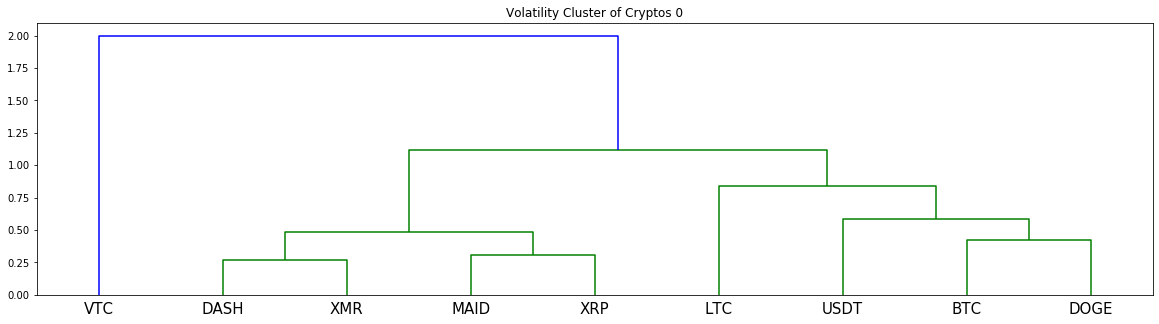

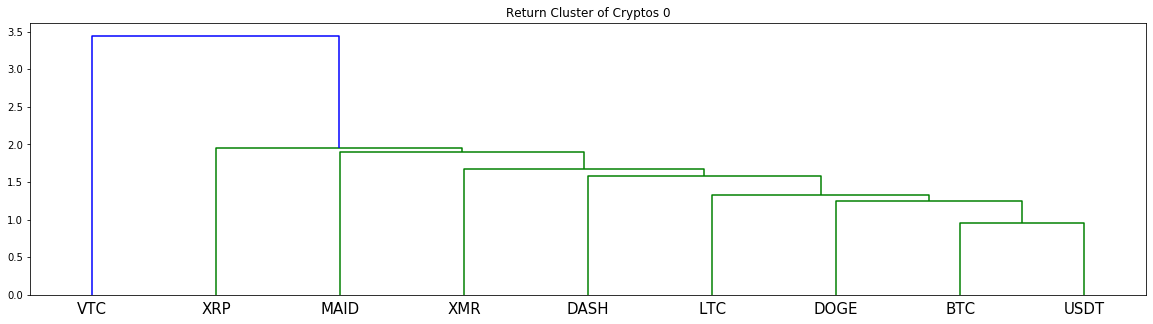

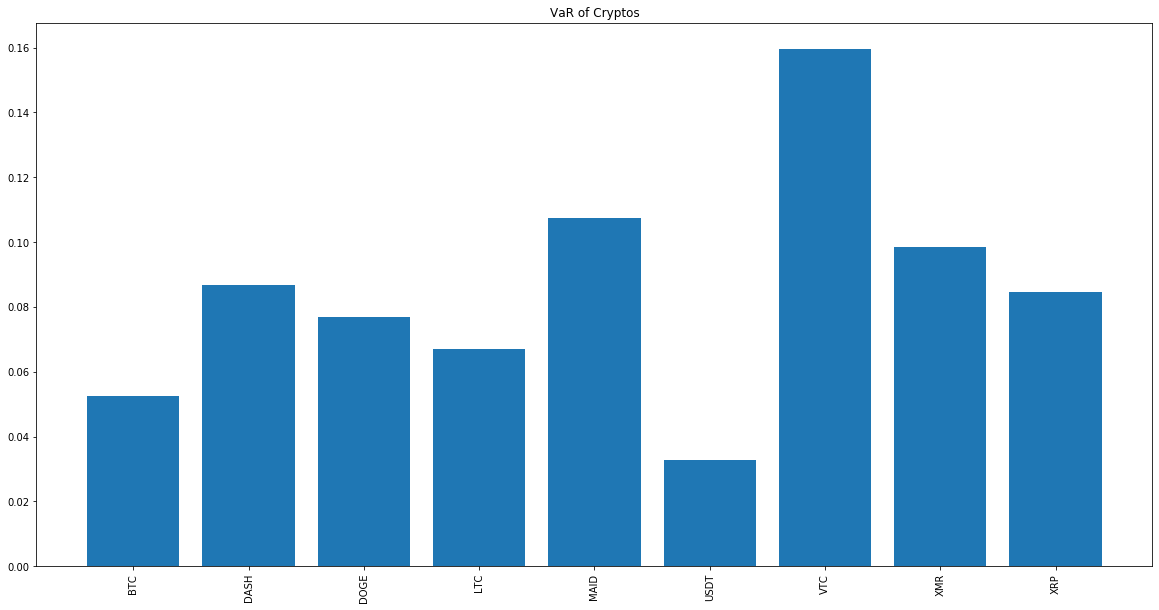

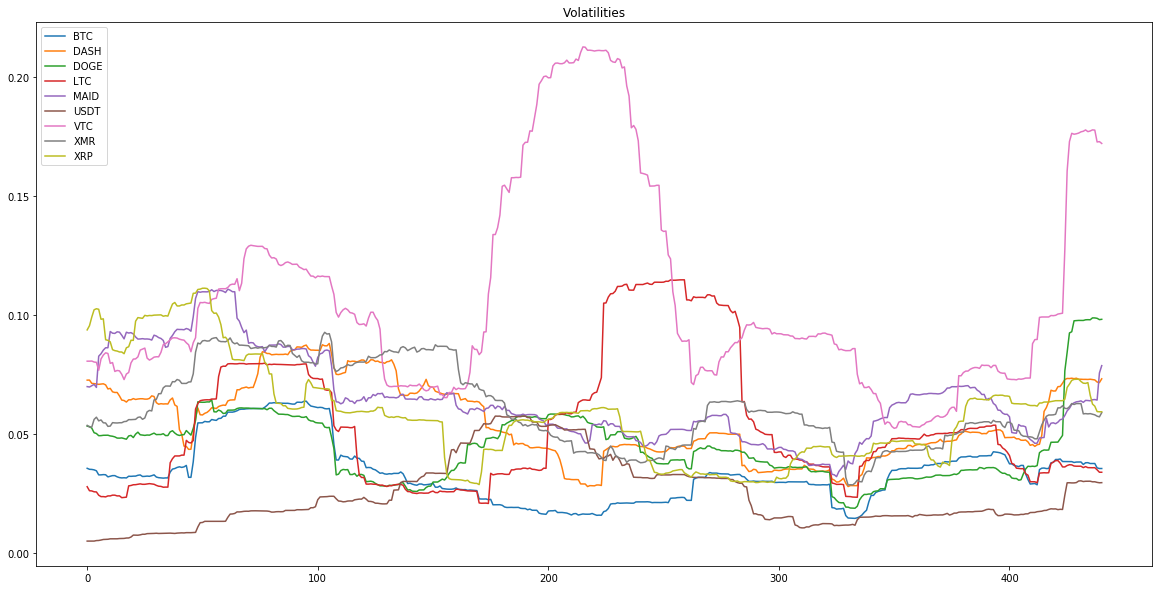

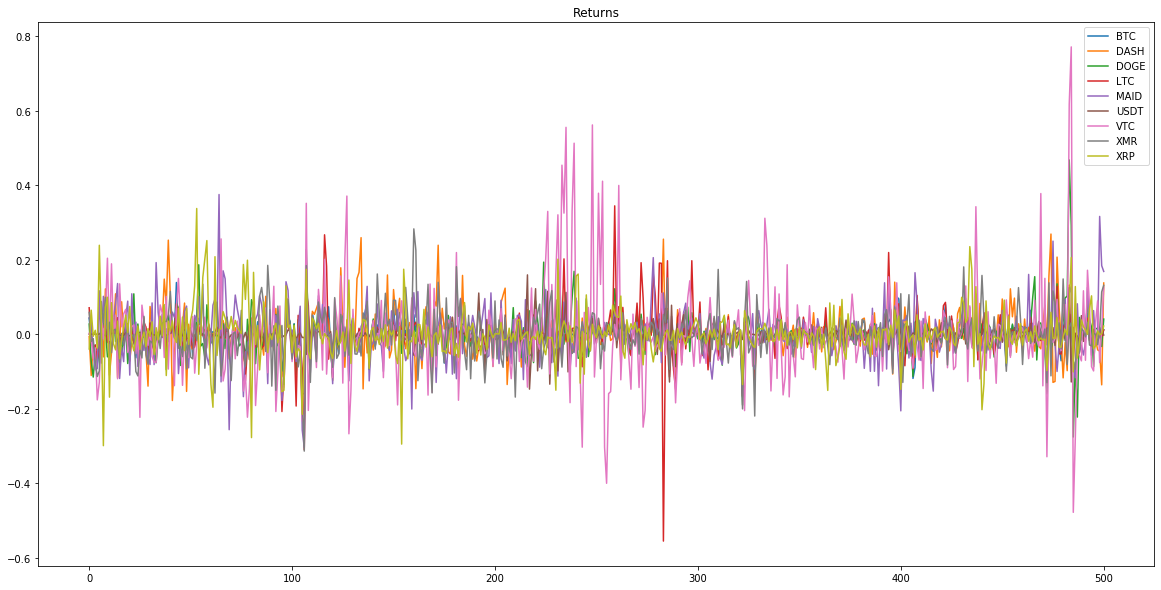

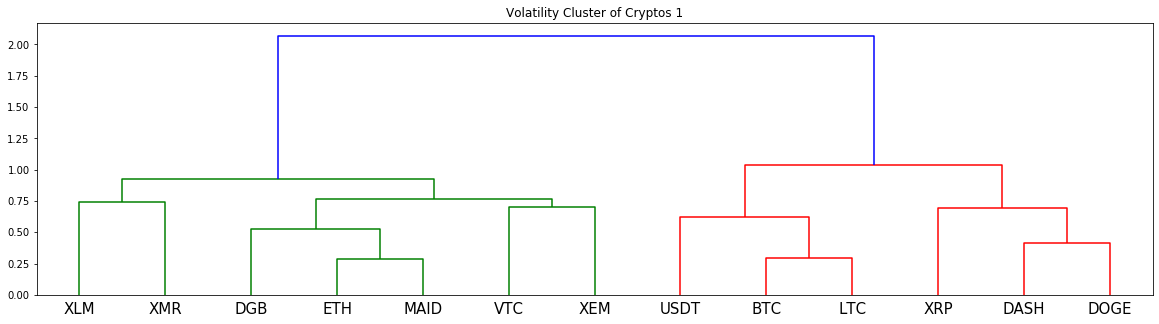

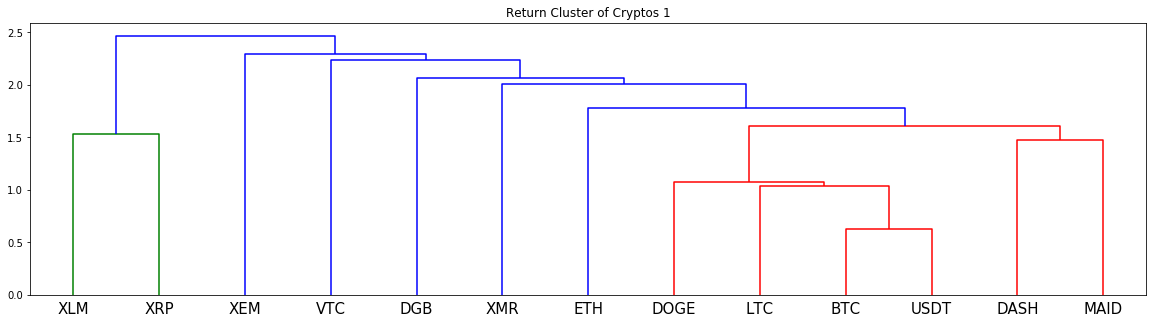

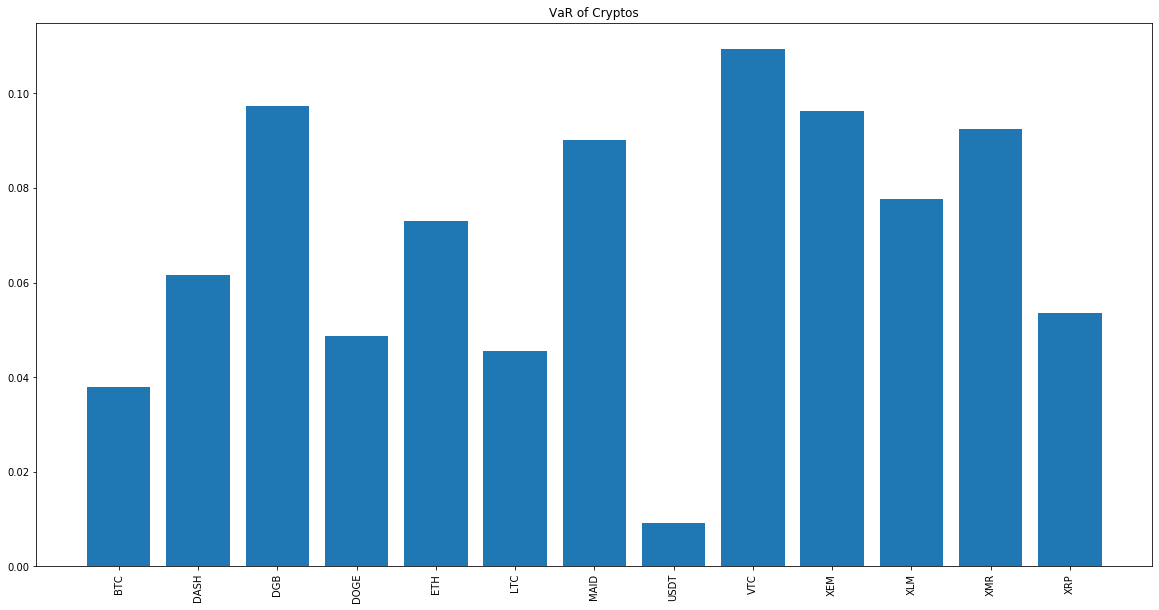

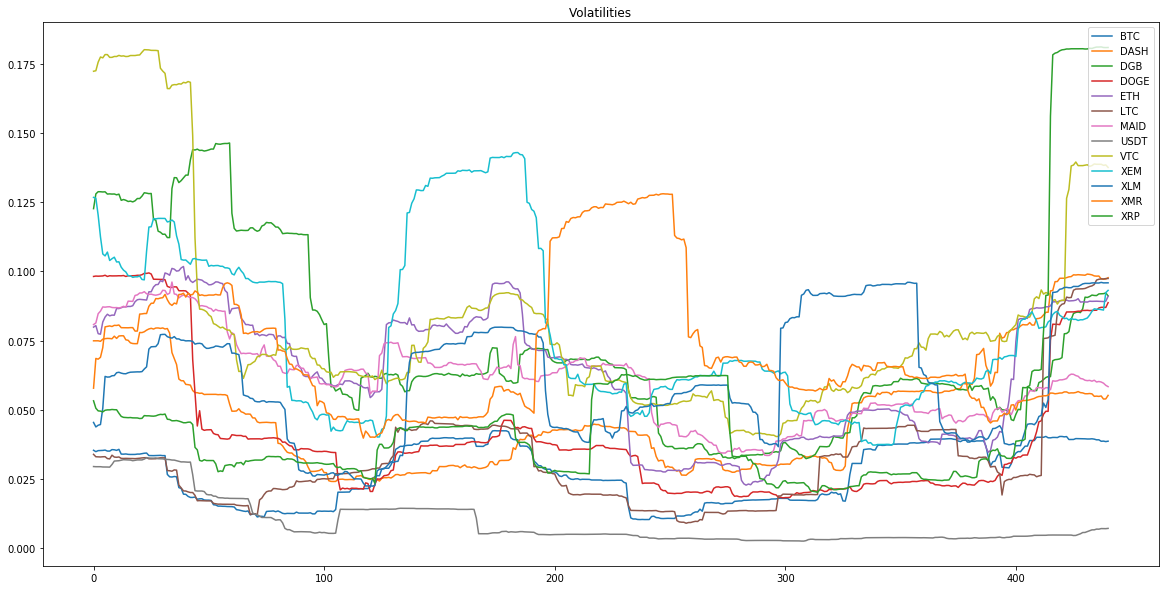

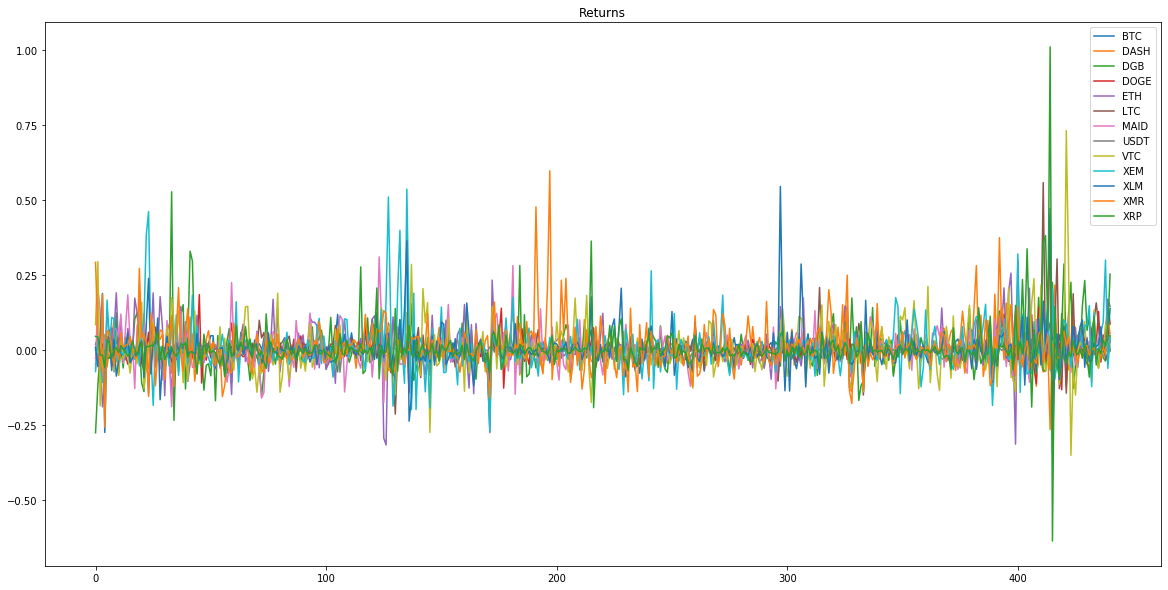

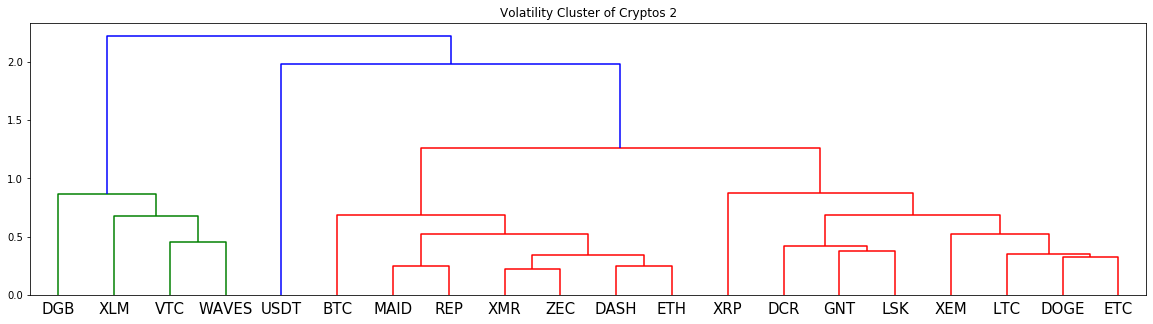

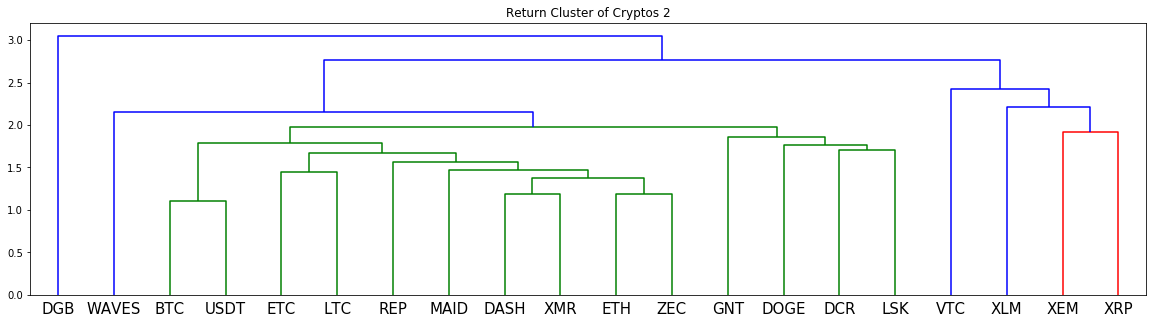

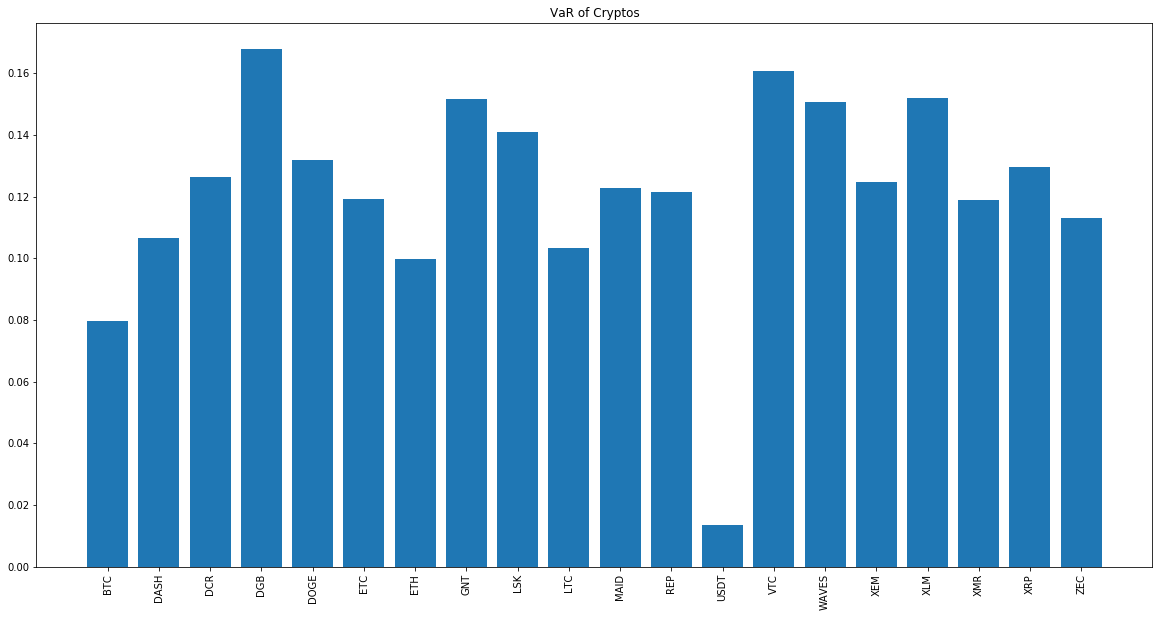

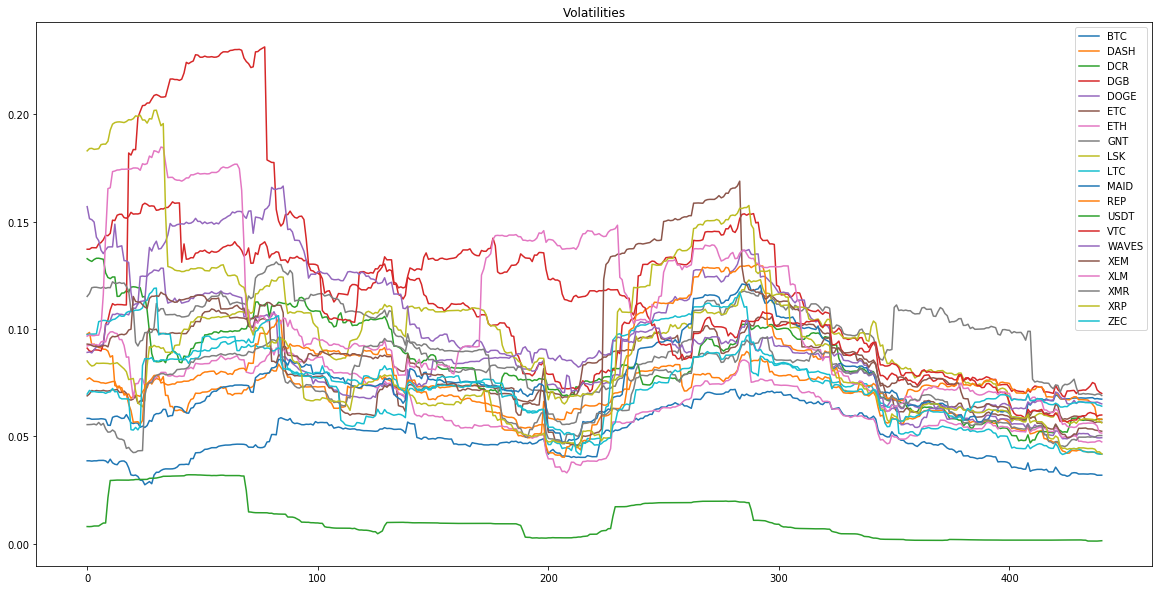

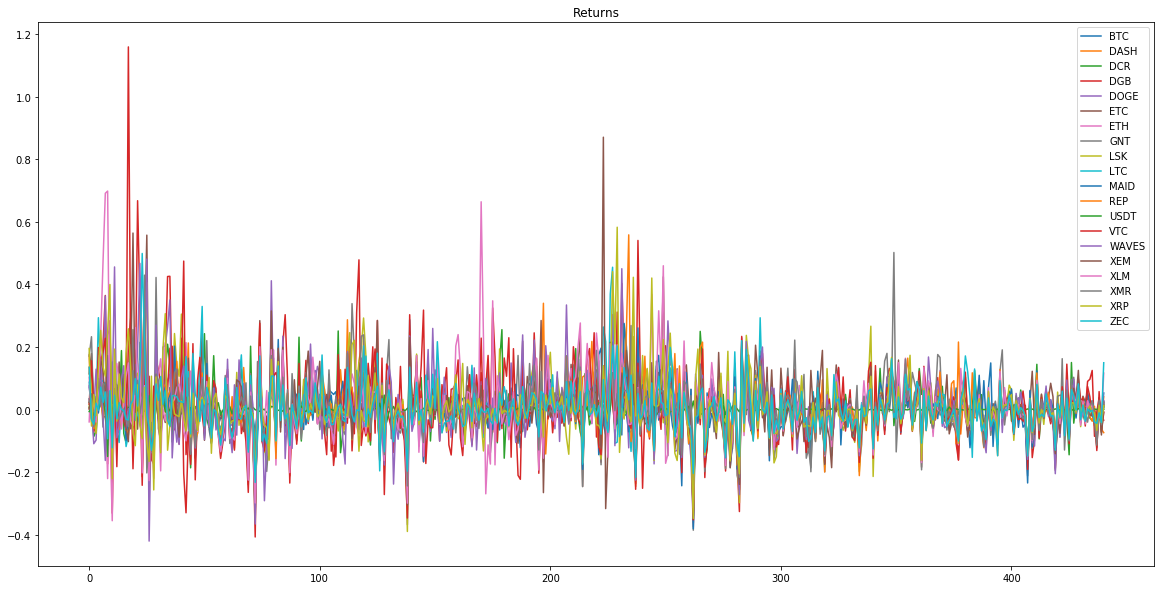

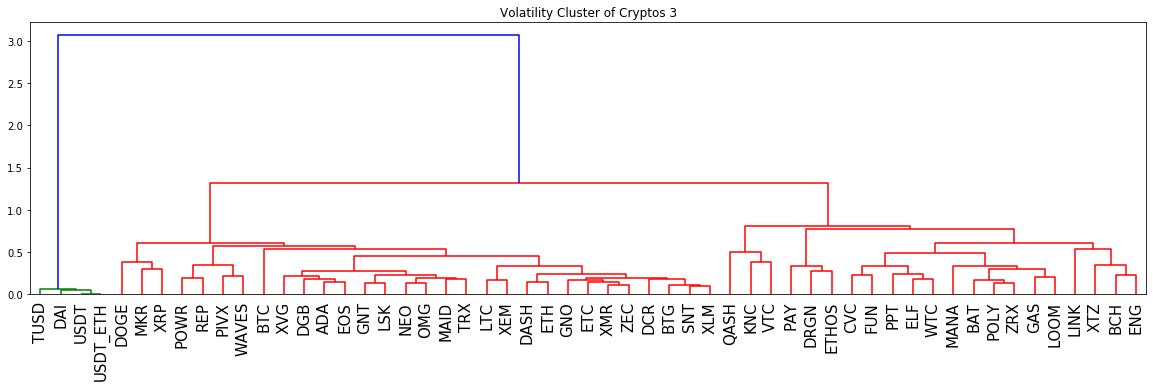

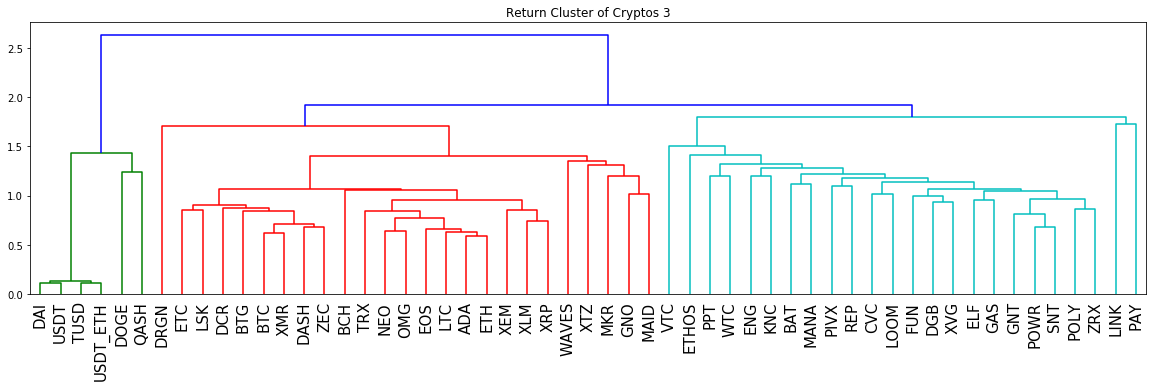

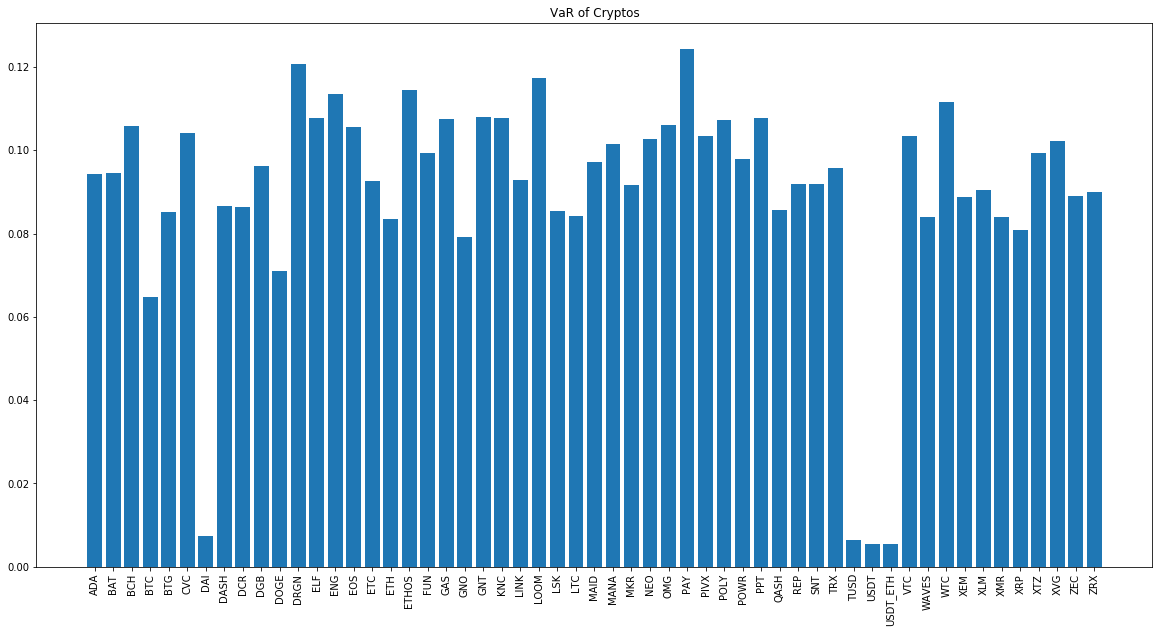

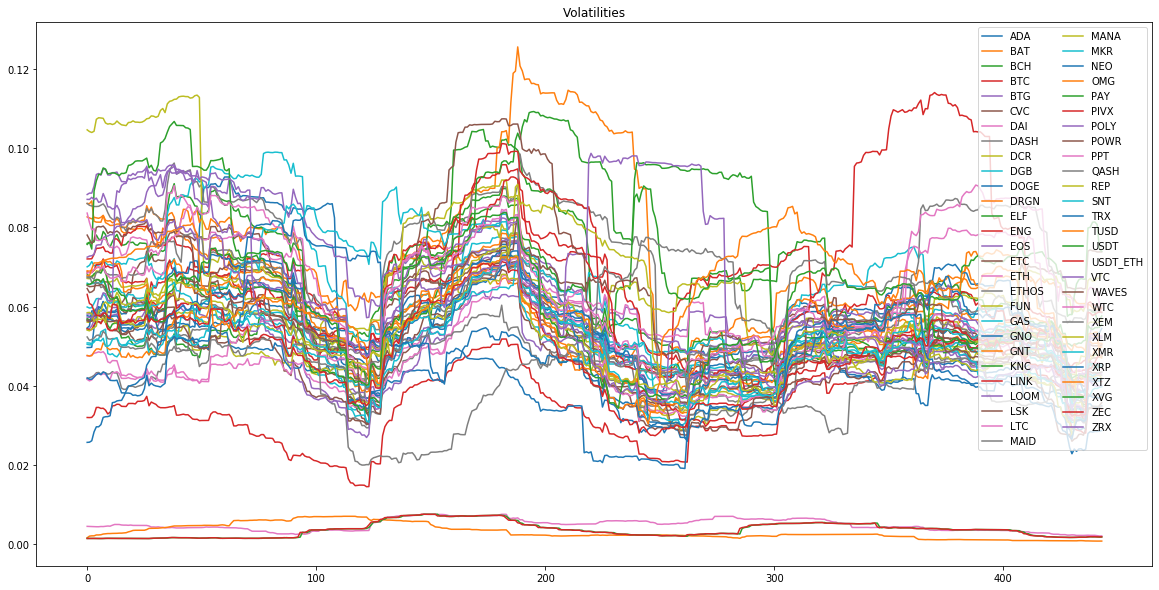

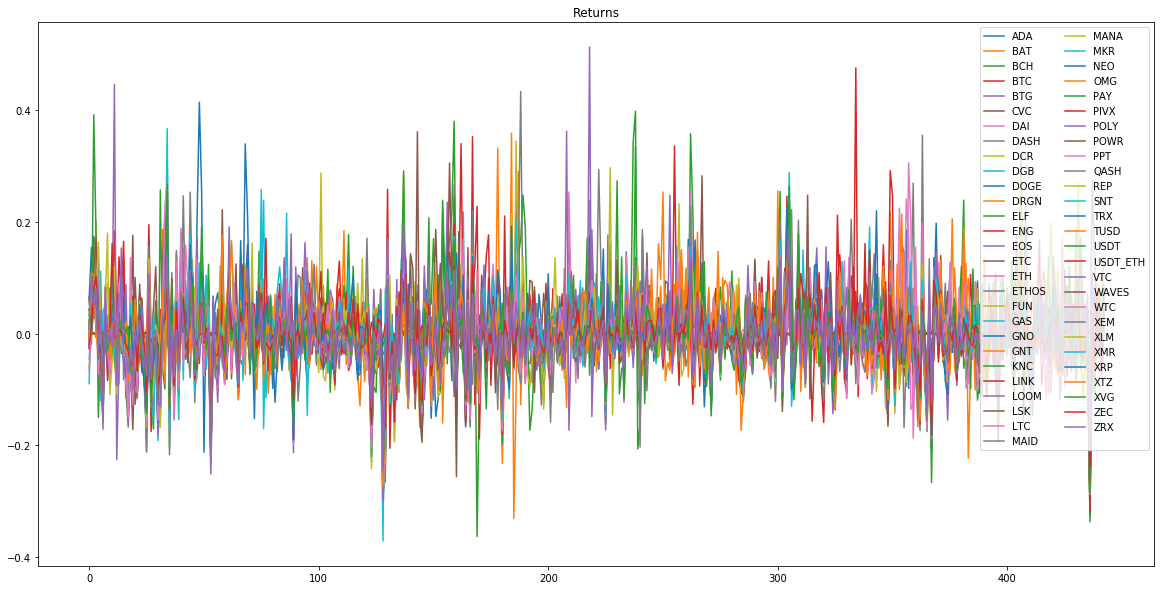

In [17]:
def get_return_cuts(log_return, return_ranges, key):
    return_cuts = []
    for i in key:
        return_cuts.append(np.array(log_return[i][return_ranges[0]:return_ranges[1]]))
    return return_cuts

period_returns = []
period_vars = []
for j in range(4):
    plt.figure(figsize=(20, 5))
    plt.title("Volatility Cluster of Cryptos " + str(j))
    dend = shc.dendrogram(shc.linkage(data_cuts[j], method='ward'),labels = data_cuts_key[j])
    ax = plt.gca()
    ax.tick_params(axis='x', which='major', labelsize=15)
    
    return_cut = get_return_cuts(log_return, return_ranges[j], data_cuts_key[j])
    period_returns.append(return_cut)
    plt.figure(figsize=(20, 5))
    plt.title("Return Cluster of Cryptos " + str(j))
    dend = shc.dendrogram(shc.linkage(return_cut, method='ward'),labels = data_cuts_key[j])
    ax = plt.gca()
    ax.tick_params(axis='x', which='major', labelsize=15)
    
    plt.figure(figsize=(20, 10))
    var = calculate_var(return_cut, data_cuts_key[j])
    period_vars.append(var)
    plt.bar(np.arange(0, len(var.columns), 1), var.iloc[0], tick_label = var.columns)
    plt.xticks(rotation=90)
    plt.title('VaR of Cryptos')
    
    plt.figure(figsize = (20, 10))
    for i in range(len(data_cuts[j])):
        plt.plot(data_cuts[j][i], label = data_cuts_key[j][i])
    if j == 3:
        plt.legend(ncol = 2)
    else:
        plt.legend()
    plt.title('Volatilities')
    
    plt.figure(figsize = (20, 10))
    for i in range(len(data_cuts[j])):
        plt.plot(return_cut[i], label = data_cuts_key[j][i])
    if j == 3:
        plt.legend(ncol = 2)
    else:
        plt.legend()
    plt.title('Returns')

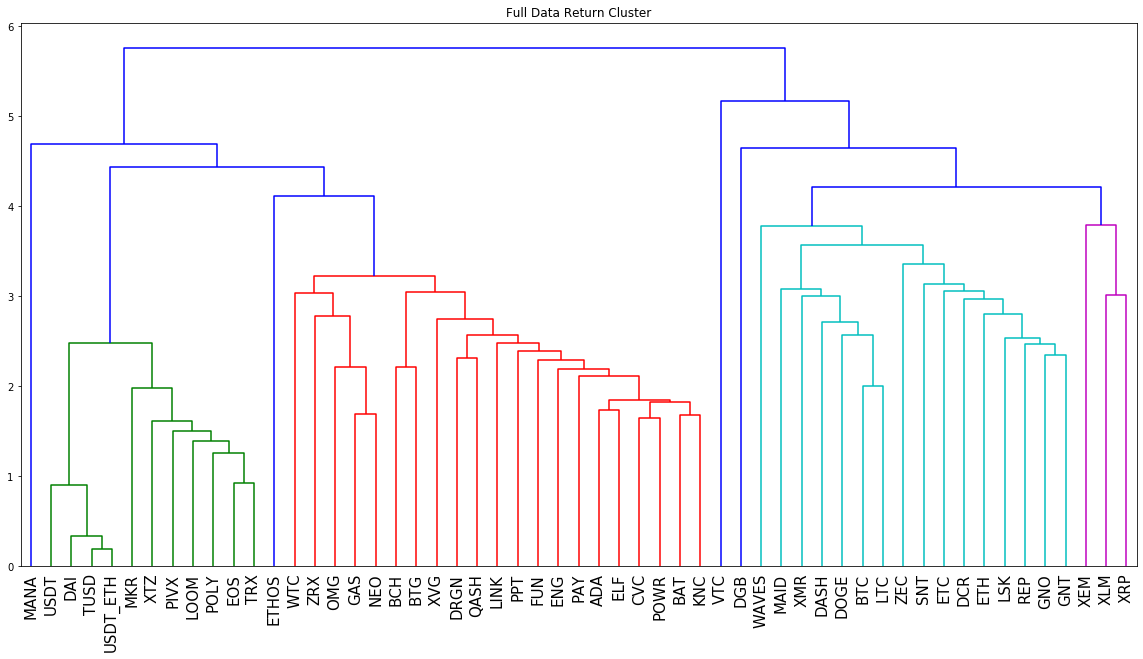

In [18]:
plt.figure(figsize=(20, 10))
plt.title("Full Data Return Cluster")
dend = shc.dendrogram(shc.linkage(log_return.T, method='ward'),labels = log_return.columns.values )
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=15)

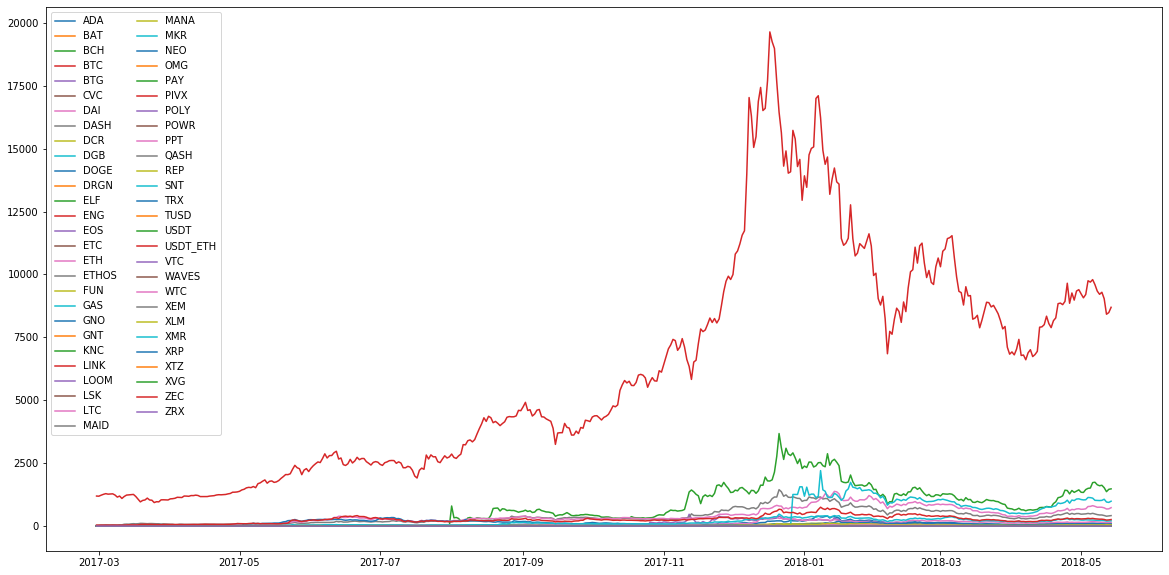

In [19]:
prices = Price[ranges[3][0]:].fillna(0)
cur_prices = Price[ranges[2][0]: ranges[2][1]].fillna(0)

plt.figure(figsize = (20, 10))
for i in cur_prices.columns:
    plt.plot(cur_prices[i], label = i)
plt.legend(ncol = 2, loc = 'upper left')

In [20]:
def make_portfolio(data, portfolio):
    ret_end = 0
    ret_beg = 0
    for i in portfolio:
        ret_end += data[i][-1]
        ret_beg += data[i][0]
    returns = ret_end / ret_beg - 1    
    
    returns_ts = []
    for i in range(1, len(data)):
        ret_c = 0
        ret_p = 0
        for j in portfolio:
            ret_c += data.iloc[i][j] 
            ret_p += data.iloc[i - 1][j]
        ret = np.log(ret_c) - np.log(ret_p)
        returns_ts.append(ret)
    returns_ts = np.array(returns_ts)
    
    SR = (np.mean(returns_ts) - 0.000014) / np.std(returns_ts)
    vol = np.std(returns_ts)
    var = np.abs(np.quantile(returns_ts, 0.05))
    
    return returns, SR, var, vol, returns_ts

v1c = ['DGB', 'XLM', 'VTC', 'WAVES']
v2c = ['MAID', 'REP', 'XMR', 'ZEC', 'DASH', 'ETH']
v3c = ['XRP', 'DCR', 'GNT', 'LSK', 'XEM', 'LTC', 'DOGE', 'ETC']
r1c = ['USDT', 'ETC', 'LTC', 'REP', 'MAID', 'DASH', 'XMR', 'ETH', 'ZEC', 'GNT', 'DOGE', 'DCR', 'LSK']
r2c = ['VTC', 'XLM', 'XEM', 'XRP']

equal = []
for i in data_cuts_key[2]:
    if i != 'BTC':
        equal.append(i)

p1, p1SR, p1var, p1vol, p1_ts = make_portfolio(prices, v1c)       
p2, p2SR, p2var, p2vol, p2_ts = make_portfolio(prices, v2c)
p3, p3SR, p3var, p3vol, p3_ts = make_portfolio(prices, v3c)
p4, p4SR, p4var, p4vol, p4_ts = make_portfolio(prices, r1c)
p5, p5SR, p5var, p5vol, p5_ts = make_portfolio(prices, r2c)
p6, p6SR, p6var, p6vol, p6_ts = make_portfolio(prices, equal)
p7, p7SR, p7var, p7vol, p7_ts = make_portfolio(prices, ['BTC'])

p1_p, p1_pSR, p1_pvar, p1_pvol, _ = make_portfolio(cur_prices, v1c)       
p2_p, p2_pSR, p2_pvar, p2_pvol, _ = make_portfolio(cur_prices, v2c)
p3_p, p3_pSR, p3_pvar, p3_pvol, _ = make_portfolio(cur_prices, v3c)
p4_p, p4_pSR, p4_pvar, p4_pvol, _ = make_portfolio(cur_prices, r1c)
p5_p, p5_pSR, p5_pvar, p5_pvol, _ = make_portfolio(cur_prices, r2c)
p6_p, p6_pSR, p6_pvar, p6_pvol, _ = make_portfolio(cur_prices, equal)

In [21]:
p4rets = np.array([np.sum(p1), np.sum(p2), np.sum(p3), np.sum(p4), np.sum(p5), np.sum(p6)])

In [22]:
p4vols = np.array([p1vol, p2vol, p3vol, p4vol, p5vol, p6vol])

In [23]:
p4sr = np.array([p1SR, p2SR, p3SR, p4SR, p5SR, p6SR])

In [24]:
p4var = np.array([p1var, p2var, p3var, p4var, p5var, p6var])

In [25]:
p3rets = np.array([np.sum(p1_p), np.sum(p2_p), np.sum(p3_p), np.sum(p4_p), np.sum(p5_p), np.sum(p6_p)])

In [26]:
p3vols = np.array([p1_pvol, p2_pvol, p3_pvol, p4_pvol, p5_pvol, p6_pvol])

In [27]:
p3sr = np.array([p1_pSR, p2_pSR, p3_pSR, p4_pSR, p5_pSR, p6_pSR])

In [28]:
p3var = np.array([p1_pvar, p2_pvar, p3_pvar, p4_pvar, p5_pvar, p6_pvar])

In [29]:
pd.DataFrame(np.c_[p4rets, p3rets, p4vols, p3vols, p4sr, p3sr, p4var, p3var], 
             index = ['Vol 1', 'Vol 2', 'Vol 3', 'Ret 1', 'Ret 2', 'Equal'],
             columns = ['P4 Returns', 'P3 Returns', 'P4 Volatilities', 'P3 Volatilities', 'P4 SR', 'P3 SR', 
                        'P4 VaR', 'P3 VaR'])

,P4 Returns,P3 Returns,P4 Volatilities,P3 Volatilities,P4 SR,P3 SR,P4 VaR,P3 VaR
Vol 1,-0.879740,27.108451,0.055391,0.105051,-0.076275,0.072041,0.091696,0.150595
Vol 2,-0.795651,15.974025,0.046678,0.062157,-0.067932,0.103313,0.084373,0.094514
Vol 3,-0.716757,34.176706,0.048549,0.072341,-0.051945,0.111662,0.079667,0.104923
Ret 1,-0.784331,17.107509,0.046261,0.060991,-0.066226,0.107698,0.082983,0.093034
Ret 2,-0.852393,63.883138,0.049715,0.096035,-0.076789,0.098601,0.091613,0.140248
Equal,-0.784745,17.146042,0.046212,0.060964,-0.066379,0.107825,0.082861,0.093209


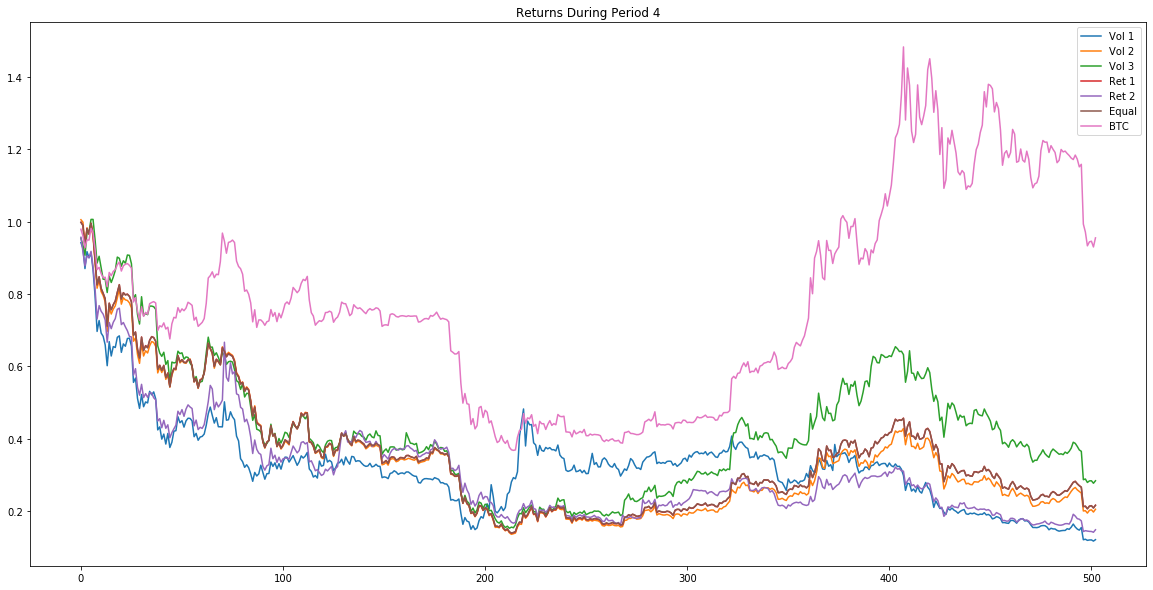

In [30]:
plt.figure(figsize = (20, 10))
plt.plot(np.exp(np.cumsum(p1_ts)), label = 'Vol 1')
plt.plot(np.exp(np.cumsum(p2_ts)), label = 'Vol 2')
plt.plot(np.exp(np.cumsum(p3_ts)), label = 'Vol 3')
plt.plot(np.exp(np.cumsum(p4_ts)), label = 'Ret 1')
plt.plot(np.exp(np.cumsum(p5_ts)), label = 'Ret 2')
plt.plot(np.exp(np.cumsum(p6_ts)), label = 'Equal')
plt.plot(np.exp(np.cumsum(p7_ts)), label = 'BTC')
plt.title('Returns During Period 4')
plt.legend()

In [31]:
'''
var_5 = []
var_3 = []
var_1 = []
for i in range(log_return.shape[1]):
    w = np.sort(log_return.iloc[:,i].values)
    var_5.append(np.abs(w[int(0.05*len(w))]))
    var_3.append(np.abs(w[int(0.03*len(w))]))
    var_1.append(np.abs(w[int(0.01*len(w))]))
var = pd.DataFrame([var_5,var_3,var_1],index = ['5% VaR','3% VaR','1% VaR'], columns = ['ADA', 'BAT', 'BCH', 'BTC', 'BTG', 'CVC', 'DAI', 'DASH', 'DCR', 'DGB',
       'DOGE', 'DRGN', 'ELF', 'ENG', 'EOS', 'ETC', 'ETH', 'ETHOS',
       'FUN', 'GAS', 'GNO', 'GNT', 'KNC', 'LINK', 'LOOM', 'LSK', 'LTC', 'MAID',
       'MANA', 'MKR', 'NEO', 'OMG', 'PAY', 'PIVX', 'POLY', 'POWR', 'PPT',
       'QASH', 'REP', 'SNT', 'TRX', 'TUSD', 'USDT', 'USDT_ETH', 'VTC', 'WAVES',
       'WTC', 'XEM', 'XLM', 'XMR', 'XRP', 'XTZ', 'XVG', 'ZEC', 'ZRX'])
       
       
var.head()
'''

"\nvar_5 = []\nvar_3 = []\nvar_1 = []\nfor i in range(log_return.shape[1]):\n    w = np.sort(log_return.iloc[:,i].values)\n    var_5.append(np.abs(w[int(0.05*len(w))]))\n    var_3.append(np.abs(w[int(0.03*len(w))]))\n    var_1.append(np.abs(w[int(0.01*len(w))]))\nvar = pd.DataFrame([var_5,var_3,var_1],index = ['5% VaR','3% VaR','1% VaR'], columns = ['ADA', 'BAT', 'BCH', 'BTC', 'BTG', 'CVC', 'DAI', 'DASH', 'DCR', 'DGB',\n       'DOGE', 'DRGN', 'ELF', 'ENG', 'EOS', 'ETC', 'ETH', 'ETHOS',\n       'FUN', 'GAS', 'GNO', 'GNT', 'KNC', 'LINK', 'LOOM', 'LSK', 'LTC', 'MAID',\n       'MANA', 'MKR', 'NEO', 'OMG', 'PAY', 'PIVX', 'POLY', 'POWR', 'PPT',\n       'QASH', 'REP', 'SNT', 'TRX', 'TUSD', 'USDT', 'USDT_ETH', 'VTC', 'WAVES',\n       'WTC', 'XEM', 'XLM', 'XMR', 'XRP', 'XTZ', 'XVG', 'ZEC', 'ZRX'])\n       \n       \nvar.head()\n"

In [32]:
'''
A = np.exp(np.cumsum(log_return['DAI']))
B = np.exp(np.cumsum(log_return['EOS']))
LS = A*2 - B
plt.plot(LS, label = 'LS')
plt.plot(A, label = 'A')
plt.plot(B, label ='B')
plt.legend()
'''

"\nA = np.exp(np.cumsum(log_return['DAI']))\nB = np.exp(np.cumsum(log_return['EOS']))\nLS = A*2 - B\nplt.plot(LS, label = 'LS')\nplt.plot(A, label = 'A')\nplt.plot(B, label ='B')\nplt.legend()\n"